<a href="https://colab.research.google.com/github/fmbento/Jupyter-Notebooks_ad-hoc-solutions/blob/main/Extract_Images_(PNGs)_from_PDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Extract** raw **images** from a **PDF Files** and packs them (PNGs) into separate zip files

### Step-by-step guide, Google Colab:

Click **show files** (1), **upload** the **PDF(s)** to the **root** folder (2) -- you can select several at the same time -- before running the cell bellow (3).

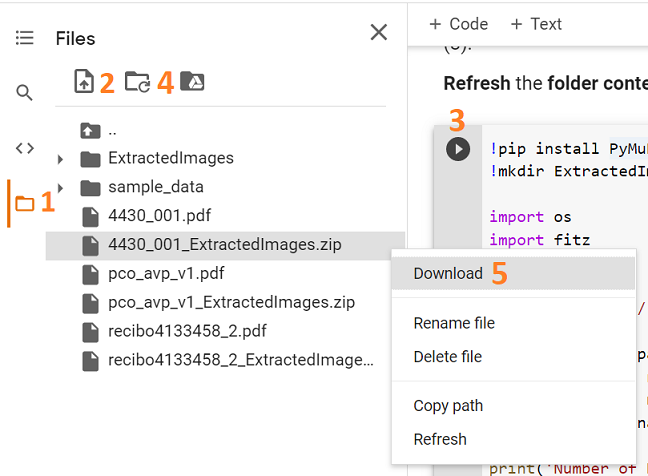

**Refresh** the **folder contents** (4) and **download** the file(s) **<** **PDF filename >_ExtractedImages.zip** (5) from the root folder.

In [ ]:
!pip install PyMuPDF
!mkdir ExtractedImages

import os
import fitz
import shutil

path_to_pdf = './'

pdf_files = [os.path.join(root, name)
             for root, dirs, files in os.walk(path_to_pdf)
             for name in files
             if name.endswith((".pdf"))] 

print('Number of PDF files ready to be loaded: ' + str(len(pdf_files)))

for index, js in enumerate(pdf_files):
  print('Extracting images from '+pdf_files[index])
  doc = fitz.open(pdf_files[index])
  for i in range(len(doc)):
      for img in doc.getPageImageList(i):
          xref = img[0]
          pix = fitz.Pixmap(doc, xref)
          if pix.n < 5:       # this is GRAY or RGB
              pix.writePNG("ExtractedImages/p%s-%s.png" % (i, xref))
          else:               # CMYK: convert to RGB first
              pix1 = fitz.Pixmap(fitz.csRGB, pix)
              pix1.writePNG("ExtractedImages/p%s-%s.png" % (i, xref))
              pix1 = None
          pix = None
  shutil.make_archive(pdf_files[index].replace(".pdf", "")+'_ExtractedImages', 'zip', './ExtractedImages', './')
  !rm ExtractedImages/*.png

print('-------- All DONE! ----------')